In [73]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [95]:
def normalised_steps():
    dx = 2*(random.random()-0.5)
    dy = 2*(random.random()-0.5)
    L = np.sqrt(dx**2+dy**2)
    dx = dx/L
    dy = dy/L
    return dx, dy

def walk(n):
    x = 0
    y = 0
    for i in range(n):
        dx, dy = normalised_steps()
        x += dx
        y += dy
        yield x,y
    return

def plotting_stats(values, trialno):
    x = []
    y = []
    deltax=[]
    deltay=[]
    for i in range(0, len(values)):
        x.append(values[i][0])
        y.append(values[i][1])
    # output delta_x**2 and delta_y**2 for calculation of R over N trials
    for i in range(1, len(x)):
        deltax.append(x[i]-x[i-1])
        deltay.append(y[i]-y[i-1])
    delta_x=sum(deltax)
    delta_y=sum(deltay)
    R_sq=(delta_x**2+delta_y**2)
    return R_sq

R_rms=[]
trials_list=[]

for steps in range(1,200):
    trials=int(steps)
    trials_list.append(trials)
    R_sq_list=[]

    for i in range(0,trials):
        walker = list(walk(steps))
        R_sq=plotting_stats(walker, trials)
        R_sq_list.append(R_sq)
    
    R_rms.append(np.sqrt(sum(R_sq_list)/trials))

Text(0, 0.5, 'R')

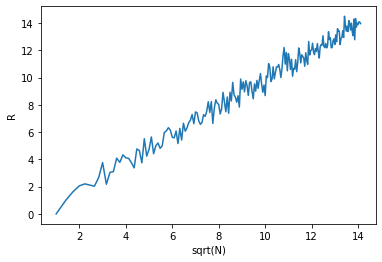

In [96]:
for i in range(0, len(trials_list)):
    trials_list[i]=np.sqrt(trials_list[i])
    
plt.plot(trials_list,R_rms)
plt.xlabel('sqrt(N)')
plt.ylabel('R')